In [3]:
import os

import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
base = 'data/compressed'
compare_base = ['1x', '1.5x', '2x', '5x', '10x']
compare_self = ['1xS', '1.5xS', '2xS', '5xS', '10xS']

compare_base = [pd.read_pickle(os.path.join(base, f'{c}.pkl')) for c in compare_base]
compare_self = [pd.read_pickle(os.path.join(base, f'{c}.pkl')) for c in compare_self]

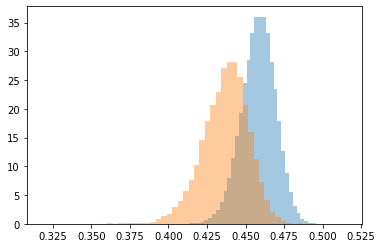

In [31]:
df = compare_self[4]['cauchy_noise']
sns.distplot(df['inter_distance']/16296, kde=False, norm_hist=True)
sns.distplot(df['intra_distance']/16296, kde=False, norm_hist=True)

In [32]:
df = compare_self[4]['cauchy_noise']


stats.kstest(df['inter_distance'], df['intra_distance'])

KstestResult(statistic=0.6024431731937675, pvalue=0.0)

In [31]:
def search_eer(intra, inter):
    len_intra = len(intra)
    len_inter = len(inter)
    

    
def search_binary(intra, inter):
    l = len(intra)
    frac = len(intra)/len(inter)
    best_p = (0, 0)
    best_val = 10e10
    
    for i in range(len(intra)):
        j = len(intra)-int(i*frac)-1

        diff = abs(intra[i]-inter[j])
        if diff < best_val:
            best_val = diff
            best_p = (i, j)
    
    tp = i
    fp = j
    tn = len(inter)-j
    fn = len(intra)-i
    
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    
    return best_p, (far, frr)

In [32]:
df = compare_self[4]['cauchy_noise']
search_binary(df['intra_distance'], df['inter_distance'])

/Users/Anton/anaconda3/envs/iaml/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ushort_scalars
  app.launch_new_instance()


((3344, 17855), (0.002566023475845709, 5.597850425436632e-05))

In [30]:
df['intra_distance'][3344]/16296

0.42427589592538045